In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
X,y=make_blobs(centers=2,cluster_std=3.5,center_box=(-15.0,15.0),random_state=0)

La función make blobs crea los datos con dos características.

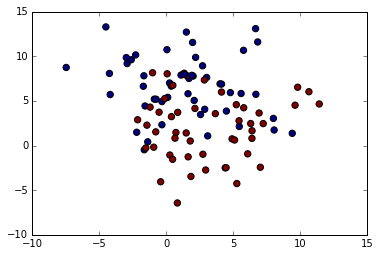

In [14]:
plt.scatter(X[:,0], X[:,1], c=y,s=40)

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)
classifier=LogisticRegression()

Se dividen los datos en datos de entrenamiento y en datos de prueba utilizando la función train_test_split

In [16]:
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)
classifier.score(X_train,y_train)

0.77333333333333332

Se observa el rendimiento del clasificador y se define la función separadora 

In [17]:
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['lightblue', 'mistyrose'])
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

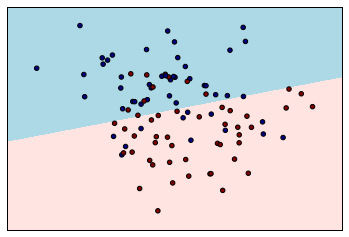

In [18]:
plot_2d_separator(classifier,X,fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

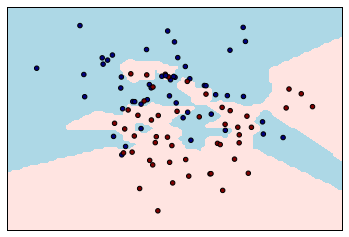

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Se observa la gráfica de primeros vecinos (con n=1)

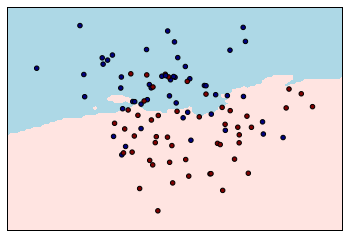

In [20]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Se observa la gráfica con los 15 vecinos mas cercanos, se observa 
una gran diferencia con la de los primeros vecinos.